In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt 
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.manifold import TSNE
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

In [5]:
data2022edited = pd.read_excel('/content/2022edited.xlsx')
data_combined = pd.read_excel('/content/Combined2019-2022.xlsx')

data2022edited.to_csv('csv_file.csv', index=False)
data = pd.read_csv('/content/csv_file.csv')
data_combined.to_csv('csv_file.csv', index=False)
data_combined = pd.read_csv('/content/csv_file.csv')

In [6]:
data.head(1)
data_combined.head(1)

,pH Raw,pH PTC,pH PTC\n (OL),pH SWC,pH Filter,pH Finish\n (OL),pH Finish,Chlorine Free,Chlorine Total,Chlorine Sample,...,Flows withinin\n plant Finish,Flows withinin\n plant Filter,Flows withinin \nplant Backwash,Flows from\n plant Bishop's,Flows from \nplant Botwood,Flows from \nplant GFW,Chemical Dosages \nChlorine,Chemical Dosages\n Alum,Chemical Dosages Lime (Pre),Chemical Dosages Lime (Post)
0,6.14,5.29,5.23,5.36,5.39,7.16,7.11,1.59,1.94,2.04,...,13.49,14.47,0.98,1.568,2.399,9.523,2.876455,28.49,5.0,9.0


In [ ]:
data.columns

Index(['Date', 'Shortcut', 'Start Time', 'pH Raw', 'pH PTC', 'pH PTC (OL)',
       'pH SWC', 'pH Filter', 'pH Finish (OL)', 'pH Finish', 'Chlorine Free',
       'Chlorine Total', 'Chlorine Sample', 'Chlorine Analyzer',
       'Colour Raw A', 'Colour Raw T', 'Colour SWC A', 'Colour Filter A',
       'Colour Finish A', 'Colour Finish T', 'Turbidity Raw',
       'Turbidity Raw (OL)', 'Turbidity SWC', 'Turbidity Filter',
       'Turbidity Finish', 'Turbidity Finish (OL)',
       'Total Dissolved Solids Raw', 'Total Dissolved Solids PTC',
       'Total Dissolved Solids SWC', 'Total Dissolved Solids Filter',
       'Total Dissolved Solids Finish', 'Conductivity Raw', 'Conductivity PTC',
       'Conductivity SWC', 'Conductivity Filter', 'Conductivity Finish',
       'Hardness Raw', 'Hardness Finish', 'Alkalinity Raw',
       'Alkalinity Finish', 'Aluminum Finish (Free)', 'Temperature Raw',
       'Temperature Finish', 'Cl Demand', 'UVT Raw', 'UVT Filter', 'UVA Raw',
       'UVA Filter', 'Flow

In [ ]:
data_combined.columns

Index(['pH Raw', 'pH PTC', 'pH PTC\n (OL)', 'pH SWC', 'pH Filter',
       'pH Finish\n (OL)', 'pH Finish', 'Chlorine Free', 'Chlorine Total',
       'Chlorine Sample', 'Chlorine Analyzer', 'Colour Raw A', 'Colour Raw T',
       'Colour SWC A', 'Colour Filter A', 'Turbidity Raw',
       'Turbidity Raw (OL)', 'Turbidity SWC', 'Turbidity Filter',
       'Turbidity Finish', 'Turbidity Finish (OL)',
       'Total Dissolved\n Solids Raw', 'Total Dissolved \nSolids PTC',
       'Total Dissolved \nSolids SWC', 'Total Dissolved\n Solids Filter',
       'Total Dissolved\n Solids Finish', 'Conductivity Raw',
       'Conductivity\n PTC', 'Conductivity \nSWC', 'Conductivity\n Filter',
       'Conductivity \nFinish', 'Hardness Raw', 'Hardness \nFinish',
       'Alkalinity Raw', 'Alkalinity Finish', 'Aluminum Finish\n (Free)',
       'Temperature Raw', 'Temperature Finish', 'Cl Demand', 'UVT Raw',
       'UVT Filter', 'UVA Raw', 'UVA Filter', 'Flows withinin plant Raw',
       'Flows withinin\n plant

I tried to set PH, Chlorine, Turbidity, Conductivity, Alkalinity and temprature as training features, and **color as lable**. 

The score of linear regression was **0.65** on training set and **0.46** on the test set.

In [ ]:
X=data[['pH Raw', 'pH PTC','pH PTC (OL)','pH SWC','pH Filter', 'pH Finish (OL)','pH Finish', 'Chlorine Free',
       'Chlorine Total', 'Chlorine Sample', 'Chlorine Analyzer','Turbidity Raw',
       'Turbidity Raw (OL)', 'Turbidity SWC', 'Turbidity Filter',
       'Turbidity Finish', 'Turbidity Finish (OL)','Conductivity Raw', 'Conductivity PTC',
       'Conductivity SWC', 'Conductivity Filter', 'Conductivity Finish','Alkalinity Raw',
       'Alkalinity Finish', 'Aluminum Finish (Free)', 'Temperature Raw',
       'Temperature Finish']]
Y=data[['Colour Filter A']]

In [7]:
X=data_combined[['pH Raw', 'pH PTC','pH SWC','pH Filter','pH Finish', 'Chlorine Free',
       'Chlorine Total', 'Chlorine Sample', 'Chlorine Analyzer','Turbidity Raw',
       'Turbidity Raw (OL)', 'Turbidity SWC', 'Turbidity Filter',
       'Turbidity Finish', 'Turbidity Finish (OL)','Conductivity Raw','Alkalinity Raw',
       'Alkalinity Finish', 'Temperature Raw','Temperature Finish']]
Y=data_combined[['Colour Filter A']]

# **Preprocessing**

In [ ]:
# from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(X)
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)

# principalComponents = pca.fit_transform(X)

# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])
# finalDf = pd.concat([principalDf, data[['Colour Filter A']]], axis = 1)

Text(0.5, 1.0, 'hp')

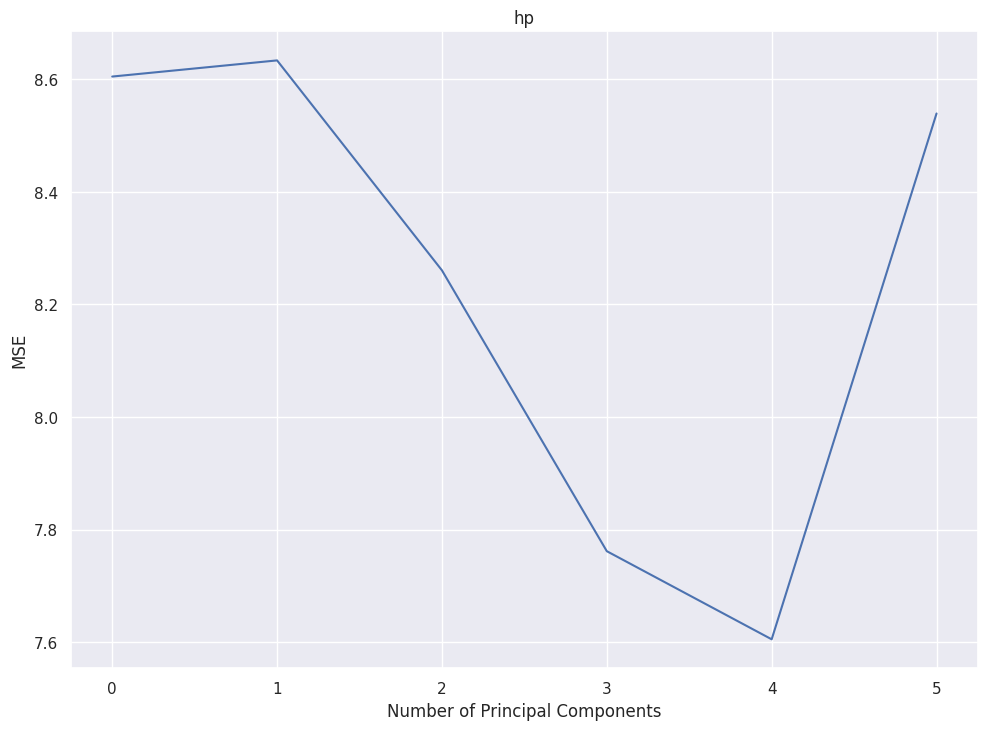

In [8]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
X = StandardScaler().fit_transform(X)
pca = PCA()
mse = []
X_reduced = pca.fit_transform(X)
regressor2 = DecisionTreeRegressor(random_state=0,max_depth=4)
#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regressor2,
           np.ones((len(X_reduced),1)), Y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regressor2,
               X_reduced[:,:i], Y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#scale the training and testing data
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)[:,:3] #Choosing the 4 first Principal components
X_reduced_train = pca.fit_transform(x_train)
X_reduced_test = pca.fit_transform(x_test)

regressor = DecisionTreeRegressor(random_state=0,max_depth=3)
#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regressor,
           X_reduced_train, y_train, cv=cv,
           scoring='neg_mean_squared_error').mean() 
#train PCR model on training data 
Model = regressor.fit(X_reduced_train[:,:3], y_train)
Score_train = Model.score(X_reduced_train[:,:3], y_train)
Score_test =Model.score(X_reduced_test[:,:3], y_test)
print("Score of train: ",Score_train)
print("Score of test: ",Score_test)


#calculate RMSE
pred = regressor.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))

Score of train:  0.44510402044082775
Score of test:  -0.08016474531009665


3.342394015520427

# **Visualizing 2D projections**

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

# targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

I tried to set PH as training features, and color as lable. 

The score of linear regression was **0.04** on training set and **-0.017** on the test set.

In [ ]:
X=data[['pH Raw', 'pH PTC','pH PTC (OL)','pH SWC','pH Filter', 'pH Finish (OL)','pH Finish']]
Y=data[['Colour Filter A']]

In [ ]:
X.iloc[:,0:3]

AttributeError: ignored

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
#np.any(np.isnan(X_train))
print(np.any(np.isnan(x_train)))
print( len(x_train))
print( len(y_train))
print( len(x_test))
print( len(y_test))

False
250
250
63
63


In [ ]:
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train)
model.score(x_test, y_test)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True)
rmse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)
print(mse)

8.792573686089588


In [ ]:
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3).fit_transform(X)

In [ ]:
Y.shape

(313, 1)

# Lets try decision trees for regression

In [ ]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#2 Importing the dataset
# dataset = pd.read_csv('Position_Salaries.csv')
# X = dataset.iloc[:, 1:2].values
# y = dataset.iloc[:, 2].values
X=data[['pH Raw', 'pH PTC','pH PTC (OL)','pH SWC','pH Filter', 'pH Finish (OL)','pH Finish']]
Y=data[['Colour Filter A']]

# It doesn't need to split the dataset because we have a small dataset
#3 Fitting the Decision Tree Regression Model to the dataset
# Create the Decision Tree regressor object here


Training score 1.0
Testing score -0.3264318208328474
RMSE+ 11.46031746031746


In [ ]:
from sklearn.tree import DecisionTreeRegressor
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
# regressor1 = DecisionTreeRegressor(random_state=0)
regressor1 = DecisionTreeRegressor(random_state=0)
regressor2 = DecisionTreeRegressor(random_state=0,max_depth=4)
#Fit the regressor object to the dataset.

model_DT1=regressor1.fit(x_train, y_train)
model_DT2=regressor2.fit(x_train, y_train)

print('Training score1',model_DT1.score(x_train, y_train))
print('Testing score1',model_DT1.score(x_test, y_test))
print('Training score2',model_DT2.score(x_train, y_train))
print('Testing score2',model_DT2.score(x_test, y_test))
y_pred1 = model_DT1.predict(x_test)
y_pred2 = model_DT2.predict(x_test)
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_true=y_test, y_pred=y_pred1, squared=True)
rmse1 = mean_squared_error(y_true=y_test, y_pred=y_pred1, squared=False)
print("RMSE+",mse1)
mse2 = mean_squared_error(y_true=y_test, y_pred=y_pred2, squared=True)
rmse2 = mean_squared_error(y_true=y_test, y_pred=y_pred2, squared=False)
print("RMSE+",mse2)

Training score1 1.0
Testing score1 -0.3264318208328474
Training score2 0.8151256036046248
Testing score2 0.344644590087938
RMSE+ 11.46031746031746
RMSE+ 5.662244322676852


In [ ]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=Y, legend='full', palette=palette)

TypeError: ignored

In [ ]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1])

TypeError: ignored

# Finding the relationship between **Color** and **Turbidity**: